# TP 2 : Régression par minimisation avec 2 variables

## Problème 1
On considère les points $(1,3)$, $(3,3)$ et $(5,4)$

On cherche l'ordonnée à l'origine $b$ et le coefficient directeur $w$ de la droite d'équation $$y=wx+b$$ minimisant la somme des carrés des distances verticales entre les points et la droite (comme représenté ci-dessous) :
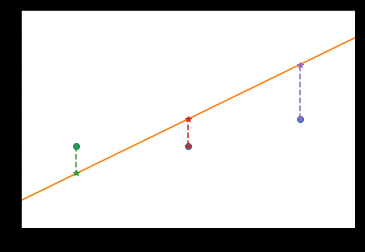

**Exercice 1.** Modéliser le programme d'optimisation à résoudre.

***Correction***

Variable : $(b,w)$  (variable bi-dimensionnelle)

Domaine : $R^2$

Fonction à minimiser : $f(b,w)=(w\times 1+b-3)^2+(w\times 3+b-3)^2+(w\times 5+b-4)^2$

## Exploration graphique

In [2]:
# Chargement des librairies Python

# Mathématiques 
import numpy as np

# Graphique
from matplotlib import pyplot as plt

### Définition des points

La liste des points $(1,3)$, $(3,3)$ et $(5,4)$ se définit par la liste des abscisses et la liste des ordonnées.

In [92]:
X=[1,3,5]
Y=[3,3,4]

### Visualisation des points

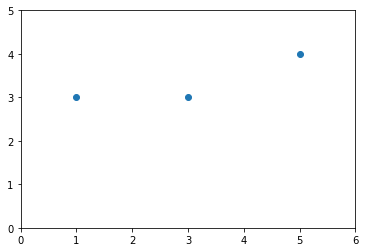

In [4]:
plt.axis([0,6,0,5]) # xmin,xmax,ymin,ymax
plt.plot(X,Y,'o') # représentation graphique des points

### Visualisation d'une droite de régression (pas forcément optimale)

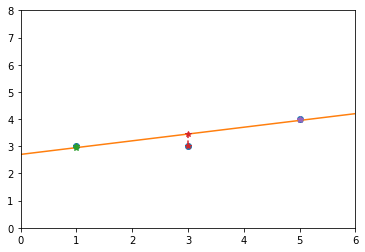

In [5]:
w=0.25
b=2.7
plt.axis([0,6,0,8])
plt.plot(X,Y,'o')
plt.plot([0,6],[b+w*0,b+w*6])
for i in range(len(X)):
    plt.plot([X[i],X[i]],[Y[i],b+w*X[i]],'*--')

***Exercice 2***
    
- Programmer un calcul qui, étant donnée $b$ et $w$, affiche les trois carrés des distance verticales entre la droite d'équation $y=b+wx$ et les points définis ci-dessus, ainsi que la somme de ces distances (pour affichier une valeur, utiliser : `print(...)')
- Utiliser cette fonction pour déterminer, à $0.1$ près, les valeurs de $b$ et $w$ optimales.
- Représenter la droite ainsi dessinée.



In [8]:
def distancecarres(b,w):
    print((b+w*X[0]-Y[0])**2)
    print((b+w*X[1]-Y[1])**2)
    print((b+w*X[2]-Y[2])**2)
    print((b+w*X[0]-Y[0])**2+(b+w*X[1]-Y[1])**2+(b+w*X[2]-Y[2])**2)

In [10]:
distancecarres(2.66,0.232)

0.011663999999999924
0.12673600000000024
0.0323999999999999
0.17080000000000006


## Représentation graphique de la fonction à minimiser

### Définition de la fonction

In [93]:
def f(b,w):
    return np.sum([(b+w*X[i]-Y[i])**2 for i in range(len(X))])

**Exercice 3.**

Quel est le résultat de la commande : `[(b+w*X[i]-Y[i])**2 for i in range(len(X))]` ?

***Correction***

`len(X)` renvoie la longueur de X, soit 3

`range(3)` renvoie la liste `[0,1,2]`

`for i in range(len(X))` : $i$ parcourt la liste `[0,1,2]`

Enfin, `[(b+w*X[i]-Y[i])**2 for i in range(len(X))]`
crée la liste :

`[(b+w*X[0]-Y[0])**2,(b+w*X[1]-Y[1])**2,(b+w*X[0]-Y[0])**2]`


### Création d'un tableau de valeurs pour $f$

In [94]:
wlist=np.linspace(0,1,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
blist=np.linspace(2,3,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
flist=[[f(b,w) for b in blist] for w in wlist] # Tableau de valeur à 2 dimensions

### Représentation graphique de la fonction

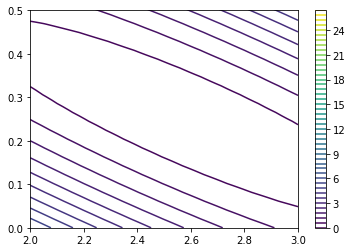

In [96]:
plt.axis([2,3,0,0.5])
plt.contour(blist,wlist,flist,50) # crée 50 courbes de niveau de la fonction f
plt.colorbar() # affiche une légende avec les niveaux

**Exercice 4.**
Peut-on lire, sur le graphique la solution $(b,w)$ optimale calculée dans l'exercice 1 ?

D'après le graphique, la solution $(b,w)$ se situe en b proche de $2.6$ et $w$ proche de 0.25

## Problème 2

On se donne un paquet de 20 points (générés aléatoirement), et on va déterminer la droite $y=b+wx$ minimisant la somme des carrés des distances verticales entre les points et la droite

### Génération aléatoire des points

In [97]:
# Génère uniformément 20 nombres entre 0 et 10
X=np.random.uniform(0, 10, 20)
# Génère 20 nombres y autour de la droite y=2x+3
# la fonction np.random.random_sample() renvoie un nombre aléatoire entre 0 et 1
Y=[2*X[i]+3+np.random.random_sample()*5 for i in range(len(X))]
print('X=',X)
print('Y=',Y)

X= [8.29388308 8.9598473  0.03611891 2.12203324 9.37540655 0.55447151
 1.92651602 6.8240105  2.58214237 3.16755502 1.31200473 3.12047832
 5.44034219 8.45920105 9.40060567 1.69303112 2.5806084  5.78934004
 7.07957522 8.18405128]
Y= [22.075995683562518, 21.655962323664784, 6.210847317693968, 7.520366945015522, 23.47733928488905, 6.510882163104203, 10.26558075290178, 20.698971114813844, 11.499500477161266, 13.37513379418434, 8.38124459902689, 12.18141975662774, 14.570874585839238, 21.22868760704153, 25.9917302916407, 6.599467840617043, 10.349666880419221, 18.55255137271569, 18.69644759077292, 21.16984570517052]


### Nuage des points

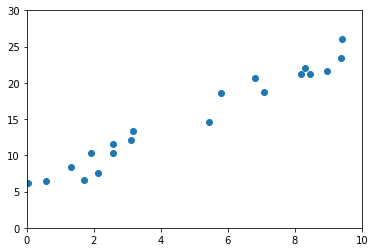

In [98]:
plt.axis([0,10,0,30])
plt.plot(X,Y,'o')

**Exercice 5.**

Utiliser Python pour résoudre graphiquement le problème :
- Programmer la fonction à minimiser
- La représenter graphiquement
- Déterminer une valeur approximative de son minimum
- Tracer le nuage de point ainsi que la droite de régression trouvée

***Correction***

In [99]:
def f(b,w):
    return np.sum([(b+w*X[i]-Y[i])**2 for i in range(len(X))])

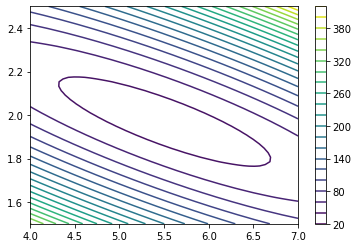

In [106]:
wmin=1.5
wmax=2.5
bmin=4
bmax=7
wlist=np.linspace(wmin,wmax,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
blist=np.linspace(bmin,bmax,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
flist=[[f(b,w) for b in blist] for w in wlist] # Tableau de valeur à 2 dimensions
plt.xlim(bmin,bmax)
plt.ylim(wmin,wmax)
plt.contour(blist,wlist,flist,20) # crée 50 courbes de niveau de la fonction f
plt.colorbar() # affiche une légende avec les niveaux

D'après le graphique, je trouve les valeurs optimales : $b$ environ égal à $5.5$ et $w$ environ égal à $2$.

**Exercice 6.**

On considère les observations :

 $X_1=\begin{pmatrix}1&1\end{pmatrix}\mapsto Y_1=1$
 $X_2=\begin{pmatrix}1&0\end{pmatrix}\mapsto Y_2=0$
 $X_3=\begin{pmatrix}0&1\end{pmatrix}\mapsto Y_3=0$ et 
 $X_4=\begin{pmatrix}0&0\end{pmatrix}\mapsto Y_4=0$.

On suppose que $\Pr(Y=1|X)=\sigma(b+W\cdot X)$ où $\sigma(x)=\frac{1}{1+e^{-x}}$ est la fonction sigmoïde. 

On cherche $(b^*,w_1^*,w_2^*)$ maximisant la log-vraisemblance :
$$\ln(L(b,W))=\sum\limits_{j=1}^{j=4} Y_j\ln(\sigma(b+W\cdot X_j))+(1-Y_j)\ln(1-\sigma(b+W\cdot X_j)).$$

Avec 3 variables à déterminer, il n'est pas possible de représenter graphiquement la fonction à optimiser.

On rappelle que le gradient d'une fonction $f$ en un point $(b,W)$ indique la direction croissante de $f$.

Programmer le calcul de $\ln(L(b,W))$ ainsi que le calcul de $[\text{grad} f](b,W)$, et utiliser ces fonctions afin de déterminer la valeur de $(b,W)$ à $0.1$ près maximisant la log-vraisemblance.